## Importing Required Libraries

A Python library is a reusable chunk of code that can be included in any programs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Reading Dataset

In [2]:
df = pd.read_csv("titanic_data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

## Finding Missing Values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#columns with null values
null_columns = [i for i in df.columns if df[i].isnull().sum() != 0]
print(null_columns)

['Age', 'Cabin', 'Embarked']


In [8]:
for i in null_columns:
    print("{}: {}%".format(i, round(df[i].isnull().sum() / df.shape[0] * 100, 2)))

Age: 19.87%
Cabin: 77.1%
Embarked: 0.22%


It has been discovered that almost *20%* of *Age* & *77%* of *Cabin* has missing data.

Missing *Age* can be replaced with some form of imputation.
But the column *Cabin* has a lot of missing values & is most likely better to be dropped.

## Survival Rate

Text(0.5, 0, 'Survival')

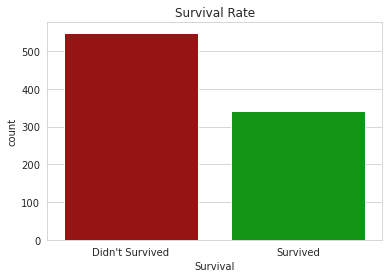

In [9]:
sb.set_style("whitegrid")
sb.set_palette(sb.color_palette(['#A00', '#0A0']))
survivalRate = sb.countplot(data = df, x = "Survived")
survivalRate.set_title("Survival Rate")
survivalRate.set_xticklabels(["Didn't Survived", "Survived"])
survivalRate.set_xlabel("Survival")

We can see that most people didn't Survive.

### Survival Rate Based on Sex

[Text(0, 0, "Didn't Survived"), Text(1, 0, 'Survived')]

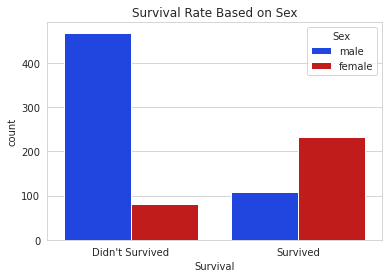

In [10]:
sb.set_palette(sb.color_palette(['#03F', '#D00']))
survivalRateSex = sb.countplot(data = df, x = "Survived", hue = "Sex")
survivalRateSex.set_title("Survival Rate Based on Sex")
survivalRateSex.set_xlabel("Survival")
survivalRateSex.set_xticklabels(["Didn't Survived", "Survived"])

From the above bargraph, we can see that among those who *didn't survive*, most are *men* & that too by a large margin.

Also the number of *females* survived is about twice that of *men*.

[Text(0, 0, "Didn't Survived"), Text(1, 0, 'Survived')]

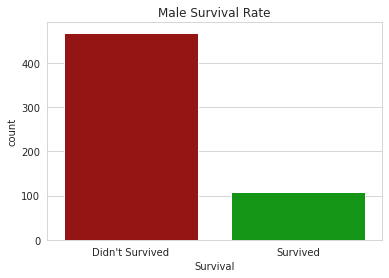

In [11]:
sb.set_palette(sb.color_palette(['#A00', '#0A0']))
survivalRateSexM = sb.countplot(data = df[df.Sex == 'male'], x = "Survived")
survivalRateSexM.set_title("Male Survival Rate")
survivalRateSexM.set_xlabel("Survival")
survivalRateSexM.set_xticklabels(["Didn't Survived", "Survived"])

This bar graph shows that most of the *male* passengers didn't survive.

[Text(0, 0, "Didn't Survived"), Text(1, 0, 'Survived')]

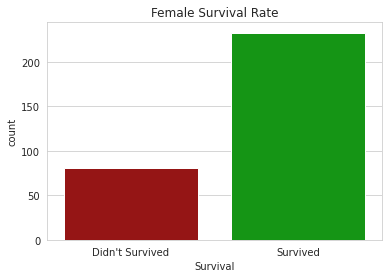

In [12]:
sb.set_palette(sb.color_palette(['#A00', '#0A0']))
survivalRateSexF = sb.countplot(data = df[df.Sex == 'female'], x = "Survived")
survivalRateSexF.set_title("Female Survival Rate")
survivalRateSexF.set_xlabel("Survival")
survivalRateSexF.set_xticklabels(["Didn't Survived", "Survived"])

This graph shows that most of the *female* passengers survived

### Survival Rate Based on Passenger Class

[Text(0, 0, "Didn't Survived"), Text(1, 0, 'Survived')]

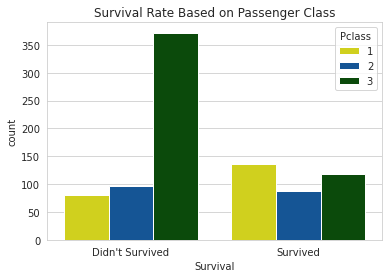

In [13]:
sb.set_palette(sb.color_palette(["#EE0", "#05A", "#050"]))
survivalRatePclass = sb.countplot(data = df, x = "Survived", hue = "Pclass")
survivalRatePclass.set_title("Survival Rate Based on Passenger Class")
survivalRatePclass.set_xlabel("Survival")
survivalRatePclass.set_xticklabels(["Didn't Survived", "Survived"])

The above graph shows that among all the *passenger classes*, *3rd class* passengers are the ones who has the least survival.

## Age Distribution Onboard

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

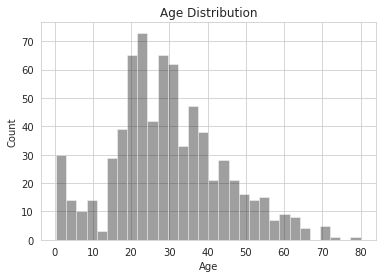

In [14]:
survivalRateAge = sb.distplot(df.Age.dropna(), color = "#111", bins = 30, kde = False)
survivalRateAge.set_ylabel("Count")
survivalRateAge.set_title("Age Distribution")

The above graph shows the distribution of age of the Titanc passengers.
It is clear that most of the pepole are within the range of *20 to 30 years*.

## Passengers based on Sex

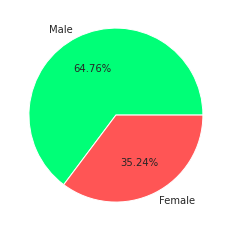

In [15]:
plt.pie(df.Sex.value_counts(), labels = ["Male", "Female"], autopct = "%1.2f%%", colors = ["#0F7", "#F55"])
plt.show()

Most of the passengers are *Males*

## Passengers based on Passenger Class

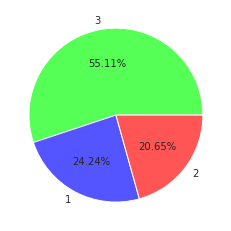

In [16]:
plt.pie(df.Pclass.value_counts(), labels = df.Pclass.unique(), autopct = "%1.2f%%", colors = ["#5F5", "#55F", "#F55"])
plt.show()

Most of the passengers were in *3rd class*

### Siblings count of Passengers

Text(0, 0.5, 'Number of Passengers')

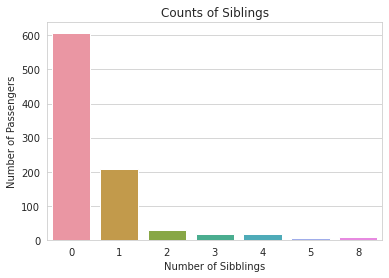

In [17]:
siblings_count = sb.countplot(data = df, x = "SibSp")
siblings_count.set_title("Counts of Siblings")
siblings_count.set_xlabel("Number of Sibblings")
siblings_count.set_ylabel("Number of Passengers")

Most of the passengers don't have any siblings.
The most number of siblings a person has is 8.

### Removing Cabin Column

We have to remove the *Cabin* column because it has over *77%* of null values.

In [18]:
df = df.drop("Cabin", axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Age Distribution across Passenger Class

Text(0, 0.5, 'Age Distribution')

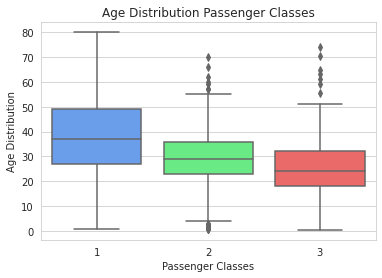

In [28]:
age_based_class = sb.boxplot(data = df, x = "Pclass", y = "Age", palette = ["#59F", "#5F7", "#F55"])
age_based_class.set_title("Age Distribution Passenger Classes")
age_based_class.set_xlabel("Passenger Classes")
age_based_class.set_ylabel("Age Distribution")

### Handling missing Age values

In [65]:
avg_age_by_class = dict()
for i in range(1, 4):
    avg_age_by_class[i] = round(df.Age[df.Pclass == i].mean())

for i in avg_age_by_class.keys():
    print(f"Passenger Class:{i} - Average Age:{avg_age_by_class[i]}")

Passenger Class:1 - Average Age:38
Passenger Class:2 - Average Age:30
Passenger Class:3 - Average Age:25


The average ages of passengers based on Passenger Class

In [72]:
def impute_age(col):
    age = col[0]
    p_class = col[1]
    if pd.isnull(age):
        return avg_age_by_class[p_class]
    return age

df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis=1)
df.Age.isnull().sum()

0

Missing *age* values has been filled with the *average ages* based on their *passenger class*